In [1]:
import numpy as np
from sklearn import linear_model, metrics, preprocessing, feature_extraction
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

In [2]:
# Load the tips dataset
tips = sns.load_dataset("tips")

In [3]:
# Add a column for the net bill ('bill') and the rate of the tip ('tip_rate'). A 20% tip would have a rate of 0.2
# This isn't used later, it's just for practice.
tips['bill'] = tips.total_bill - tips.tip
tips['tip_rate'] = tips.tip / tips.bill

In [4]:
# Look at the head of tips
tips.head()

,total_bill,tip,sex,smoker,day,time,size,bill,tip_rate
0,16.99,1.01,Female,No,Sun,Dinner,2,15.98,0.063204
1,10.34,1.66,Male,No,Sun,Dinner,3,8.68,0.191244
2,21.01,3.50,Male,No,Sun,Dinner,3,17.51,0.199886
3,23.68,3.31,Male,No,Sun,Dinner,2,20.37,0.162494
4,24.59,3.61,Female,No,Sun,Dinner,4,20.98,0.172069


In [5]:
# Summary of the data
tips.describe()

,total_bill,tip,size,bill,tip_rate
count,244.000000,244.000000,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672,16.787664,0.202123
std,8.902412,1.383638,0.951100,8.032459,0.163385
min,3.070000,1.000000,1.000000,2.070000,0.036955
25%,13.347500,2.000000,2.000000,11.000000,0.148274
50%,17.795000,2.900000,2.000000,14.555000,0.183110
75%,24.127500,3.562500,3.000000,20.685000,0.236821
max,50.810000,10.000000,6.000000,43.170000,2.452381


In [6]:
# Create linear regression object
regr1 = linear_model.LinearRegression()

In [7]:
# First do a simple fit with a single variable
fit1 = regr1.fit(tips[['bill', 'size']], tips.tip)

In [8]:
# Dump intercept and coefficients
print("Intercept:", fit1.intercept_)
print("Slopes:", fit1.coef_)

Intercept: 0.847900042585
Slopes: [ 0.07601591  0.34021815]


In [9]:
# Mean absolute error: on average, how far off is our estimate?
pred1 = fit1.predict(tips[['bill', 'size']])
metrics.mean_absolute_error(tips.tip, pred1)

0.81189511351637667

In [10]:
# R^2
metrics.r2_score(tips.tip, pred1)

0.36890829231212208

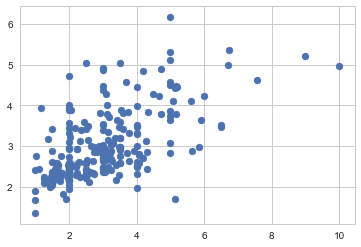

In [11]:
# Compare the predicted versus actual
# Use plt.scatter instead of sns.distplot
plt.scatter(tips.tip, pred1)

In [12]:
# To use some of the other predictors like time and sex, we need to encode the predictors.
# If they had more than two values, we would need to also do one-hot encoding
encoder = preprocessing.LabelEncoder()
tips['sex_encoded'] = encoder.fit_transform(tips.sex)
tips['time_encoded'] = encoder.fit_transform(tips.time)

In [13]:
# See the effect of the encoding
tips.head()

,total_bill,tip,sex,smoker,day,time,size,bill,tip_rate,sex_encoded,time_encoded
0,16.99,1.01,Female,No,Sun,Dinner,2,15.98,0.063204,0,0
1,10.34,1.66,Male,No,Sun,Dinner,3,8.68,0.191244,1,0
2,21.01,3.50,Male,No,Sun,Dinner,3,17.51,0.199886,1,0
3,23.68,3.31,Male,No,Sun,Dinner,2,20.37,0.162494,1,0
4,24.59,3.61,Female,No,Sun,Dinner,4,20.98,0.172069,0,0


In [14]:
# Try using the kitcen sink of predictors
regr2 = linear_model.LinearRegression()
fit2 = regr2.fit(tips[['bill', 'size', 'sex_encoded', 'time_encoded']], tips.tip)

In [15]:
# Get the predictions and compute MAE again. Note that the error is very slightly lower.
pred2 = fit2.predict(tips[['bill', 'size', 'sex_encoded', 'time_encoded']])
metrics.mean_absolute_error(tips.tip, pred2)

0.81065475678839571

In [16]:
# Statsmodels can be a lot easier to work with for basic tasks, and it allows formula syntax
fit3 = smf.ols(formula='tip ~ bill + size + sex + time', data=tips).fit()
fit3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.369
Model:                            OLS   Adj. R-squared:                  0.359
Method:                 Least Squares   F-statistic:                     34.97
Date:                Sun, 09 Apr 2017   Prob (F-statistic):           5.50e-23
Time:                        09:17:04   Log-Likelihood:                -368.73
No. Observations:                 244   AIC:                             747.5
Df Residuals:                     239   BIC:                             765.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept          0.8204      0.246      3.331      0.001         0.335     1.306
sex[T.Female]     -0.0044      0.152     -0.029      0.977        -0.304     0.296
time[T.Dinner]     0.0537      0.164      0.328      0.743        -0.269     0.376
bill               0.0754      0.011      6.843      0.000         0.054     0.097
size               0.3403      0.092      3.713      0.000         0.160     0.521
==============================================================================
Omnibus:                       42.880   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               87.172
Skew:                           0.876   Prob(JB):                     1.18e-19
Kurtosis:                       5.347   Cond. No.                         72.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
# Now let's do a categorical prediction
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [18]:
# This has some redundant columns. Let's see what the values for class and who are
print(titanic['class'].unique())
print(titanic['who'].unique())

[Third, First, Second]
Categories (3, object): [Third, First, Second]
['man' 'woman' 'child']


In [19]:
# Manually encode some binary predictors in the titanic data set
titanic['woman'] = titanic.who == 'woman'
titanic['child'] = titanic.who == 'child'
titanic['first_class'] = titanic['class'] == 'First'
titanic['second_class'] = titanic['class'] == 'Second'

In [20]:
# Do a very basic logistic regression
logreg1 = linear_model.LogisticRegression()
logfit1 = logreg1.fit(titanic[['woman', 'child', 'first_class', 'second_class']], titanic.survived)

In [21]:
# Get the predictions and score
logpred1 = logfit1.predict(titanic[['woman', 'child', 'first_class', 'second_class']])

In [22]:
# Accuracy: how often is our prediction correct?
metrics.accuracy_score(titanic.survived, logpred1)

0.79797979797979801

In [23]:
# Precision: when we say someone survived, how often are we correct?
metrics.precision_score(titanic.survived, logpred1)

0.77364864864864868

In [24]:
# Recall: how many of the survivors did we correctly identify?
metrics.recall_score(titanic.survived, logpred1)

0.66959064327485385